# Proyecto PPCD

In [2]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score,train_test_split

pd.set_option('display.float_format', lambda x: "{:,.5f}".format(x))
cf.go_offline()

## Dataset

In [6]:
df1 = pd.read_csv("student-mat.csv")

In [7]:
df2 = pd.read_csv("student-por.csv")

In [9]:
df = pd.concat( [df1,df2],ignore_index = True)

In [10]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Limpieza

### Duplicados

In [12]:
df.pop("G1")
df.pop("G2")
df.pop("G3")

0        6
1        6
2       10
3       15
4       10
        ..
1039    10
1040    16
1041     9
1042    10
1043    11
Name: G3, Length: 1044, dtype: int64

In [14]:
df.duplicated().mean()

0.03735632183908046

In [17]:
df = df.drop_duplicates()

### Clasisificación y elección de variables

In [19]:
target = "Walc"

In [20]:
ls_disc =['school',
          'sex',
          'address',
         'famsize',
         'Pstatus',
         'Mjob',
         'Fjob',
         'famsup',
           'paid',
         'activities',
         'nursery',
         'higher',
         'internet',
         'romantic',
         ]

ls_cont = ['age',
           'traveltime',
            'studytime',
            'failures',
          'famrel',
         'freetime',
         'goout',
         'Dalc',
         'health',
         'absences']

### Valores nulos y unarias

In [18]:
df.isna().mean()

school       0.00000
sex          0.00000
age          0.00000
address      0.00000
famsize      0.00000
Pstatus      0.00000
Medu         0.00000
Fedu         0.00000
Mjob         0.00000
Fjob         0.00000
reason       0.00000
guardian     0.00000
traveltime   0.00000
studytime    0.00000
failures     0.00000
schoolsup    0.00000
famsup       0.00000
paid         0.00000
activities   0.00000
nursery      0.00000
higher       0.00000
internet     0.00000
romantic     0.00000
famrel       0.00000
freetime     0.00000
goout        0.00000
Dalc         0.00000
Walc         0.00000
health       0.00000
absences     0.00000
dtype: float64

In [21]:
ls_unarias = [feature for feature, frequency in df.nunique().items() if frequency == 1]

In [22]:
ls_unarias

[]

### Análisis continuas

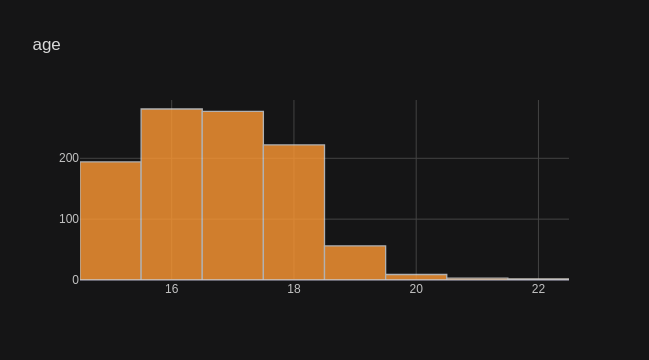

None

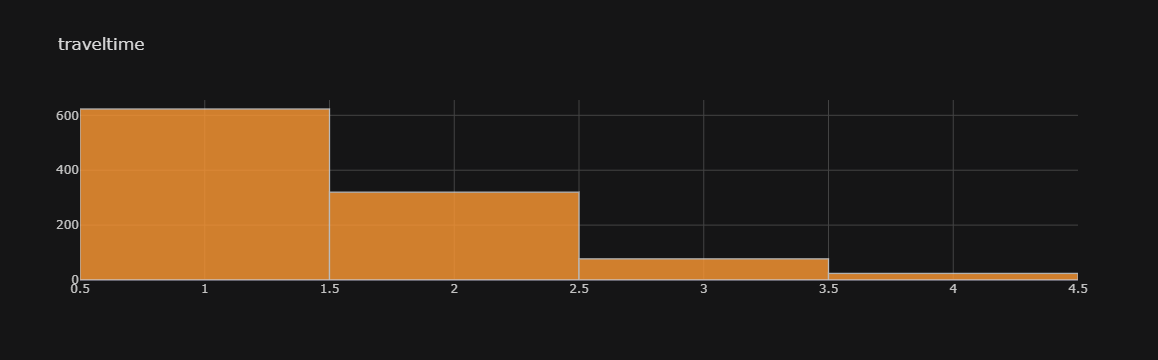

None

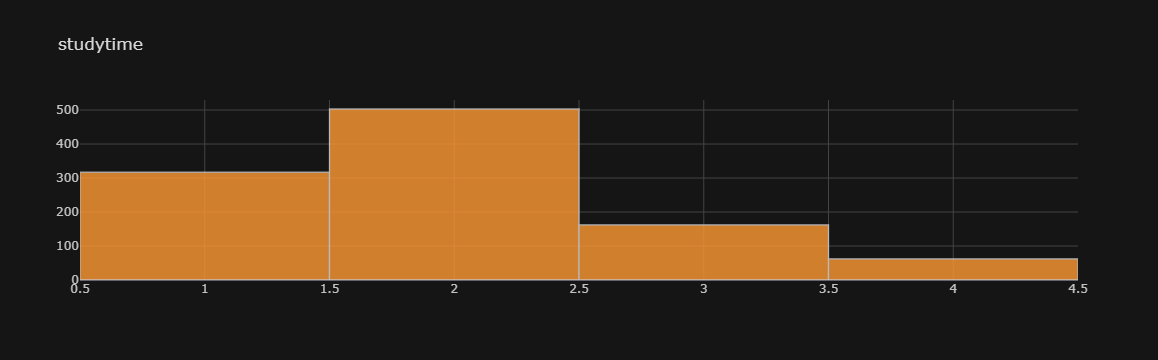

None

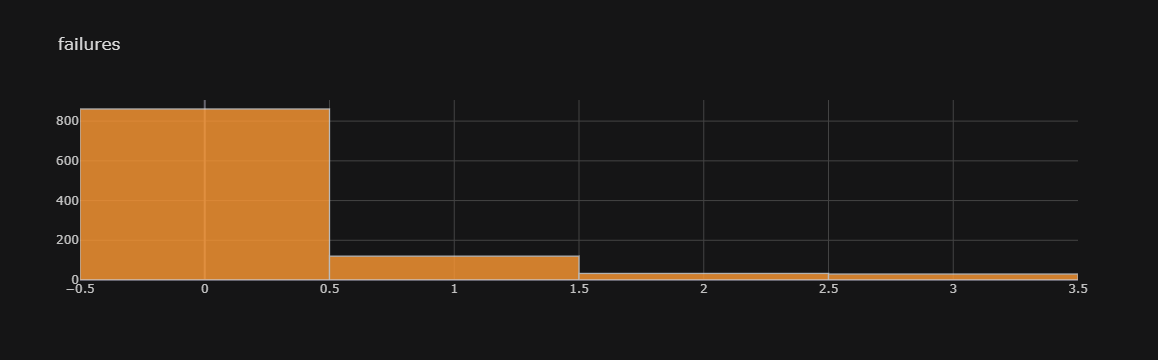

None

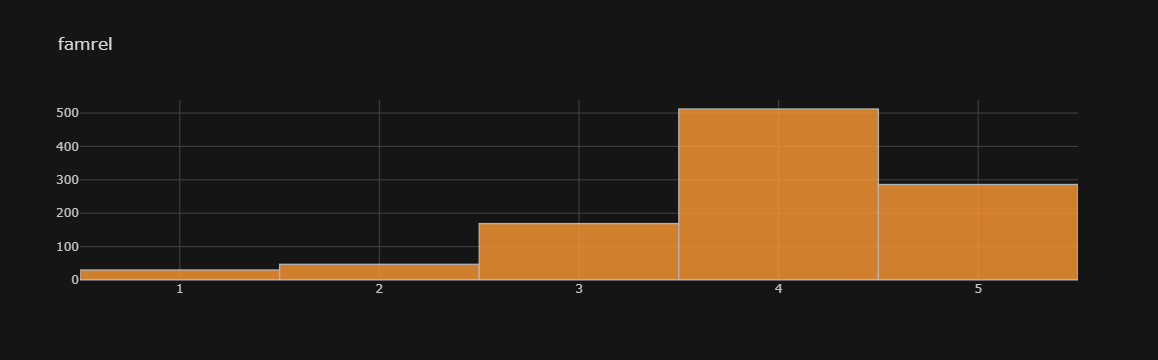

None

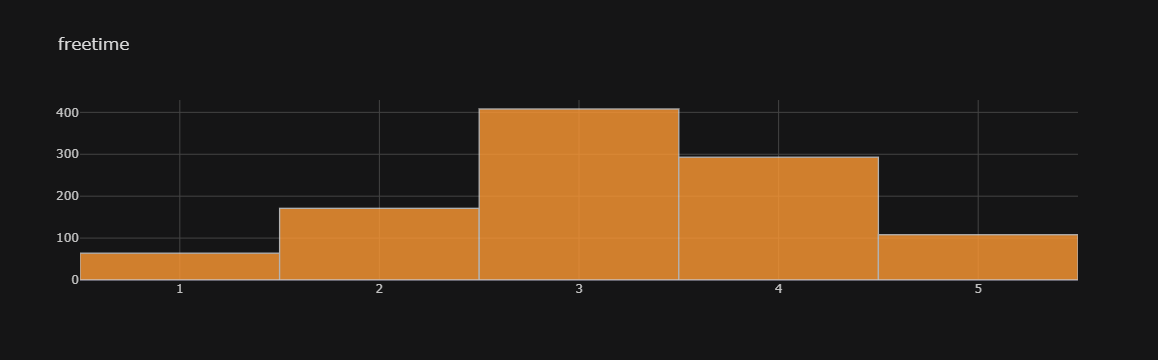

None

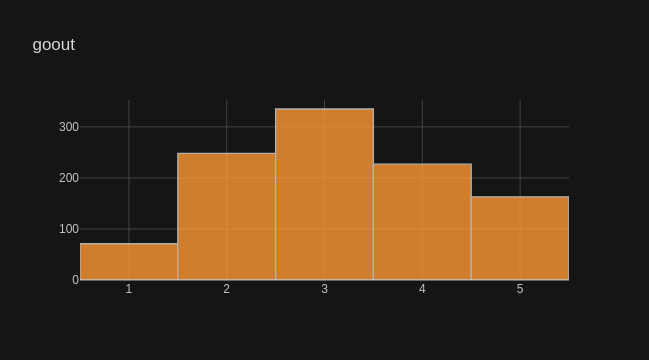

None

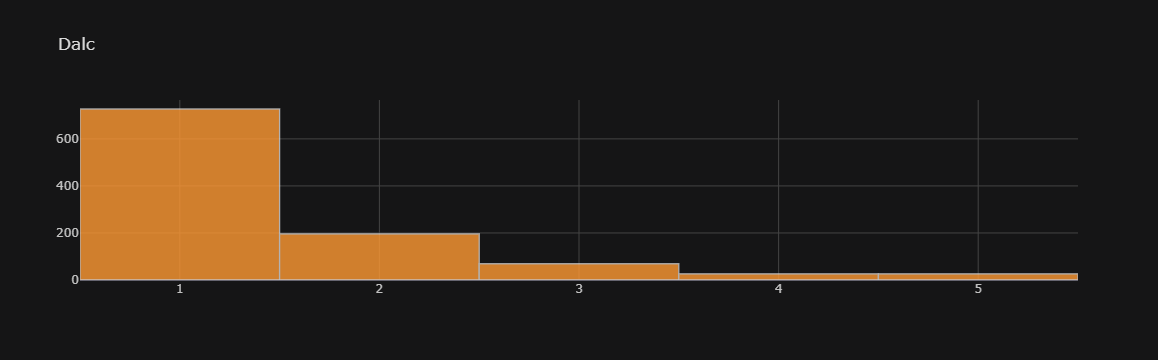

None

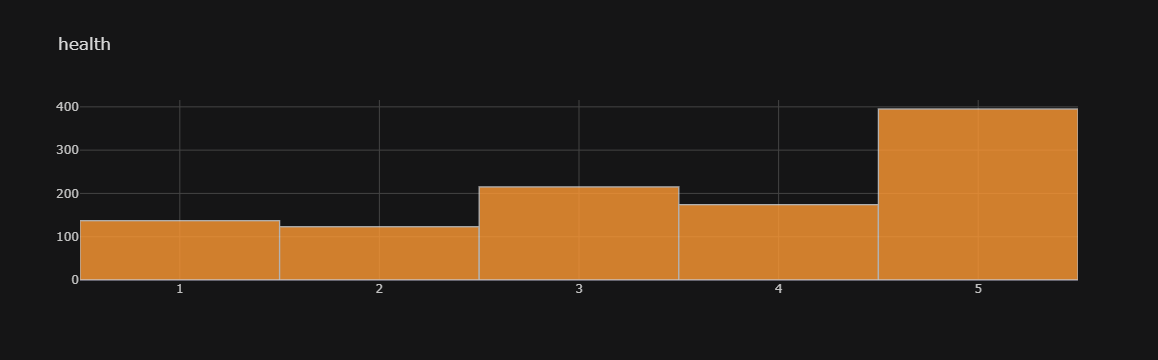

None

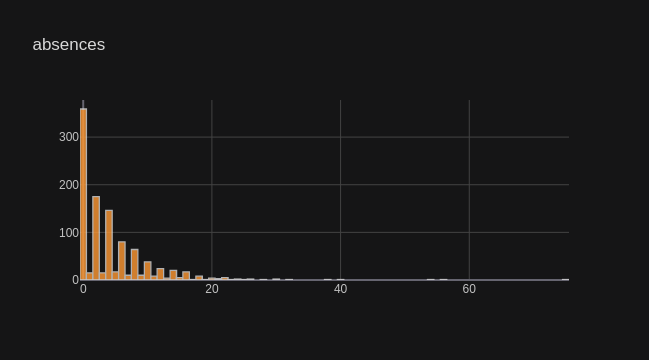

None

In [21]:
for feature in ls_cont:
    df[feature] = df[feature].astype(float)
    display(df[feature].iplot(kind="hist", theme="solar", title=feature))

#### Outlayers continuas

In [23]:
corte =df["absences"].quantile(0.99)

In [25]:
df=df[df["absences"]<=corte]

In [27]:
len(df)

994

### Transformación binarias 

In [28]:
dic = {"no":0,"yes":1,"T":1,"A":0,"F":1,"M":1}

In [29]:
ls_bin = ["romantic","Pstatus","sex","famsup"]

In [37]:
for feature in ls_bin:
    df[feature].replace(dic,inplace= True)
    ls_cont.append(feature)

In [33]:
df[ls_bin].head()

,romantic,Pstatus,sex,famsup
0,0,0,1,0
1,0,1,1,1
2,0,1,1,0
3,1,1,1,1
4,0,1,1,1


## Modelo

### Variables

In [40]:
X = df[ls_cont]

In [57]:
y = df[[target]]

In [58]:
X_train, X_test, y_train,y_test = train_test_split(X,y)

In [77]:
mms_x = MinMaxScaler()
mms_y = MinMaxScaler()
Xs= mms_x.fit_transform(X_train)
ys = mms_y.fit_transform(y_train)
yst = mms_y.fit_transform(y_test)
Xst = mms_x.fit_transform(X_test)

### Regresión logística

In [182]:
logreg = LogisticRegression(max_iter=10000)

In [183]:
logreg.fit(X_train, y_train)

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=10000)

In [184]:
ls_res = cross_val_score(estimator = logreg, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring="r2")

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [185]:
np.mean(ls_res), np.std(ls_res)

(0.20383555999092678, 0.03265823321943416)

In [186]:
logreg.score(X_test, y_test)

0.5020080321285141

In [67]:
pd.DataFrame(zip(ls_cont, logreg.coef_[0])).sort_values(by=1)

,0,1
7,Dalc,-2.15314
6,goout,-0.66698
11,Pstatus,-0.39960
8,health,-0.20962
0,age,-0.05401
9,absences,-0.03744
1,traveltime,-0.00840
12,sex,0.01048
3,failures,0.18108
10,romantic,0.19952


In [187]:
dc_scores={}
dc_scores.update({str(logreg).split("(")[0]: (np.mean(ls_res),logreg.score(X_test, y_test))})

### Ridge

In [188]:
ridgereg = Ridge(alpha=0)

In [189]:
ridgereg.fit(Xs, ys)

Ridge(alpha=0)

In [190]:
ls_res = cross_val_score(estimator = ridgereg, X=Xs, y=ys, cv=4, n_jobs=-1, scoring="r2")

In [191]:
ls_res

array([0.49930539, 0.51200512, 0.39973993, 0.46987435])

In [84]:
np.mean(ls_res), np.std(ls_res)

(0.4702311975745894, 0.04347273817745524)

In [192]:
ridgereg.score(Xst,yst)

0.49419354492417933

#### Mejor Ridge

In [79]:
for i in range(0, 1000, 5):
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X, y)
    ls_res = cross_val_score(estimator = ridgereg, X=Xs, y=ys, cv=4, n_jobs=-1, scoring="r2")
    print(i, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

0 47.02% 0.04
5 46.70% 0.04
10 45.57% 0.03
15 44.13% 0.03
20 42.60% 0.02
25 41.06% 0.02
30 39.57% 0.02
35 38.14% 0.02
40 36.78% 0.02
45 35.50% 0.02
50 34.29% 0.01
55 33.15% 0.01
60 32.07% 0.01
65 31.06% 0.01
70 30.10% 0.01
75 29.20% 0.01
80 28.34% 0.01
85 27.54% 0.01
90 26.77% 0.01
95 26.05% 0.01
100 25.36% 0.01
105 24.70% 0.01
110 24.08% 0.01
115 23.48% 0.01
120 22.92% 0.01
125 22.38% 0.01
130 21.86% 0.01
135 21.37% 0.01
140 20.89% 0.01
145 20.44% 0.01
150 20.00% 0.01
155 19.59% 0.01
160 19.19% 0.01
165 18.80% 0.01
170 18.43% 0.01
175 18.07% 0.01
180 17.73% 0.01
185 17.40% 0.01
190 17.08% 0.01
195 16.77% 0.01
200 16.47% 0.01
205 16.18% 0.01
210 15.91% 0.01
215 15.64% 0.01
220 15.38% 0.01
225 15.12% 0.01
230 14.88% 0.01
235 14.64% 0.01
240 14.41% 0.01
245 14.19% 0.01
250 13.97% 0.01
255 13.76% 0.01
260 13.56% 0.01
265 13.36% 0.01
270 13.16% 0.01
275 12.98% 0.01
280 12.79% 0.01
285 12.62% 0.01
290 12.44% 0.01
295 12.27% 0.01
300 12.11% 0.01
305 11.95% 0.01
310 11.79% 0.01
315 11.64% 0.0

In [183]:
ridgereg.intercept_

array([0.85505999])

In [193]:
pd.DataFrame(zip(X.columns, ridgereg.coef_[0])).sort_values(by=1)

,0,1
4,famrel,-0.11396
2,studytime,-0.10762
5,freetime,-0.04885
3,failures,-0.04359
13,famsup,-0.04090
10,romantic,-0.02690
12,sex,0.00000
0,age,0.01016
1,traveltime,0.01640
11,Pstatus,0.03295


In [93]:
ridgereg.score(Xst,yst)

0.49419354492417933

In [194]:
dc_scores.update({str(ridgereg).split("(")[0]: (np.mean(ls_res),ridgereg.score(Xst,yst))})

### Lasso

In [195]:
lassreg = Lasso(alpha=1/100)

In [196]:
lassreg.fit(Xs, ys)

Lasso(alpha=0.01)

In [197]:
ls_res = cross_val_score(estimator = lassreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [112]:
ls_res

array([0.52430377, 0.51325394, 0.45608882, 0.40947499])

In [113]:
np.mean(ls_res), np.std(ls_res)

(0.4757803789457956, 0.046214039222036964)

In [208]:
lassreg.intercept_

array([0.13421661])

In [114]:
pd.DataFrame(zip(X.columns, lassreg.coef_)).sort_values(by=1)

,0,1
2,studytime,-0.02255
13,famsup,-0.00259
0,age,0.00000
1,traveltime,0.00000
3,failures,0.00000
4,famrel,-0.00000
5,freetime,0.00000
9,absences,0.00000
10,romantic,-0.00000
11,Pstatus,0.00000


#### Mejor Lasso

In [99]:
for i in range(0, 1010, 10):
    lasso = Lasso(alpha=i/100)
    lasso.fit(X, y)
    ls_res = cross_val_score(estimator = lasso, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
    print(i, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

/tmp/ipykernel_4033/785752883.py:3: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.119e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: UserWarning:

With alpha=0, this algorith

0 47.48% 0.05
10 45.00% 0.03
20 41.38% 0.02
30 36.69% 0.02
40 30.08% 0.02
50 21.72% 0.02
60 13.34% 0.01
70 3.89% 0.01
80 0.27% 0.01
90 0.10% 0.01
100 -0.11% 0.00
110 -0.33% 0.01
120 -0.48% 0.01
130 -0.54% 0.01
140 -0.54% 0.01
150 -0.54% 0.01
160 -0.54% 0.01
170 -0.54% 0.01
180 -0.54% 0.01
190 -0.54% 0.01
200 -0.54% 0.01
210 -0.54% 0.01
220 -0.54% 0.01
230 -0.54% 0.01
240 -0.54% 0.01
250 -0.54% 0.01
260 -0.54% 0.01
270 -0.54% 0.01
280 -0.54% 0.01
290 -0.54% 0.01
300 -0.54% 0.01
310 -0.54% 0.01
320 -0.54% 0.01
330 -0.54% 0.01
340 -0.54% 0.01
350 -0.54% 0.01
360 -0.54% 0.01
370 -0.54% 0.01
380 -0.54% 0.01
390 -0.54% 0.01
400 -0.54% 0.01
410 -0.54% 0.01
420 -0.54% 0.01
430 -0.54% 0.01
440 -0.54% 0.01
450 -0.54% 0.01
460 -0.54% 0.01
470 -0.54% 0.01
480 -0.54% 0.01
490 -0.54% 0.01
500 -0.54% 0.01
510 -0.54% 0.01
520 -0.54% 0.01
530 -0.54% 0.01
540 -0.54% 0.01
550 -0.54% 0.01
560 -0.54% 0.01
570 -0.54% 0.01
580 -0.54% 0.01
590 -0.54% 0.01
600 -0.54% 0.01
610 -0.54% 0.01
620 -0.54% 0.01
630 -0

In [199]:
dc_scores.update({str(lasso).split("(")[0]: np.mean(ls_res)})

### Red elástica

In [200]:
elasnet = ElasticNet(alpha=0.001, l1_ratio=0.07)

In [201]:
elasnet.fit(Xs, ys)

ElasticNet(alpha=0.001, l1_ratio=0.07)

In [202]:
ls_res = cross_val_score(estimator = elasnet, X=Xs, y=ys, cv=4, n_jobs=-1, scoring="r2")

In [130]:
ls_res

array([0.49877898, 0.51136726, 0.40245486, 0.4710123 ])

In [131]:
np.mean(ls_res), np.std(ls_res)

(0.4709033499867358, 0.04212952232247967)

#### Mejor Red elastica

In [117]:
df_res = pd.DataFrame(columns=["alpha", "l1_ratio", "score", "std"])
contador = 0
for i in range(1, 1000, 10):
    for j in range(10):
        elasnet = ElasticNet(alpha=i/100, l1_ratio=j/10,max_iter=10000)
        elasnet.fit(X, y)
        ls_res = cross_val_score(estimator = elasnet, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
        df_res.loc[contador, "alpha"] = i
        df_res.loc[contador, "l1_ratio"] = j
        df_res.loc[contador, "score"] = np.mean(ls_res)
        df_res.loc[contador, "std"] = np.std(ls_res)
        contador += 1
        print(i/100, j/10, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.155e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.063e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.01 0.0 47.53% 0.05
0.01 0.1 47.55% 0.05
0.01 0.2 47.56% 0.05
0.01 0.3 47.58% 0.05
0.01 0.4 47.59% 0.05
0.01 0.5 47.60% 0.05
0.01 0.6 47.60% 0.05
0.01 0.7 47.60% 0.05
0.01 0.8 47.60% 0.05
0.01 0.9 47.59% 0.05


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.472e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.285e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.11 0.0 47.34% 0.04
0.11 0.1 47.25% 0.04
0.11 0.2 47.07% 0.04
0.11 0.3 46.81% 0.04
0.11 0.4 46.54% 0.03
0.11 0.5 46.30% 0.03
0.11 0.6 46.01% 0.03
0.11 0.7 45.67% 0.03
0.11 0.8 45.28% 0.03
0.11 0.9 44.95% 0.03


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.729e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.465e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.21 0.0 46.56% 0.03
0.21 0.1 46.21% 0.03
0.21 0.2 45.68% 0.03
0.21 0.3 45.12% 0.03
0.21 0.4 44.43% 0.03
0.21 0.5 43.73% 0.02
0.21 0.6 43.06% 0.02
0.21 0.7 42.33% 0.02
0.21 0.8 41.86% 0.02
0.21 0.9 41.45% 0.02


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.946e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.617e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.31 0.0 45.54% 0.03
0.31 0.1 44.88% 0.03
0.31 0.2 43.97% 0.02
0.31 0.3 42.86% 0.02
0.31 0.4 41.81% 0.02
0.31 0.5 40.67% 0.02
0.31 0.6 39.92% 0.02
0.31 0.7 39.14% 0.02
0.31 0.8 38.26% 0.02
0.31 0.9 37.25% 0.02


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.132e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.748e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.41 0.0 44.41% 0.03
0.41 0.1 43.36% 0.02
0.41 0.2 41.98% 0.02
0.41 0.3 40.45% 0.02
0.41 0.4 38.91% 0.02
0.41 0.5 37.80% 0.02
0.41 0.6 36.56% 0.02
0.41 0.7 35.12% 0.02
0.41 0.8 33.46% 0.02
0.41 0.9 31.54% 0.02


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.294e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.51 0.0 43.25% 0.03
0.51 0.1 41.79% 0.02
0.51 0.2 39.85% 0.02
0.51 0.3 37.89% 0.02
0.51 0.4 36.25% 0.02
0.51 0.5 34.59% 0.02
0.51 0.6 32.63% 0.02
0.51 0.7 30.31% 0.02
0.51 0.8 27.59% 0.02
0.51 0.9 24.37% 0.02


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.437e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.961e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.61 0.0 42.09% 0.02
0.61 0.1 40.20% 0.02
0.61 0.2 37.78% 0.02
0.61 0.3 35.40% 0.02
0.61 0.4 33.43% 0.01
0.61 0.5 31.06% 0.02
0.61 0.6 28.22% 0.02
0.61 0.7 24.82% 0.02
0.61 0.8 20.74% 0.02
0.61 0.9 16.62% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.564e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.050e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.71 0.0 40.95% 0.02
0.71 0.1 38.58% 0.02
0.71 0.2 35.69% 0.02
0.71 0.3 33.07% 0.01
0.71 0.4 30.47% 0.01
0.71 0.5 27.30% 0.01
0.71 0.6 23.44% 0.02
0.71 0.7 18.76% 0.02
0.71 0.8 14.11% 0.01
0.71 0.9 9.17% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.678e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.130e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.81 0.0 39.84% 0.02
0.81 0.1 36.98% 0.02
0.81 0.2 33.60% 0.02
0.81 0.3 30.72% 0.01
0.81 0.4 27.43% 0.01
0.81 0.5 23.37% 0.01
0.81 0.6 18.36% 0.02
0.81 0.7 13.06% 0.01
0.81 0.8 7.72% 0.01
0.81 0.9 1.15% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.781e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.202e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.91 0.0 38.78% 0.02
0.91 0.1 35.41% 0.02
0.91 0.2 31.62% 0.01
0.91 0.3 28.36% 0.01
0.91 0.4 24.33% 0.01
0.91 0.5 19.31% 0.01
0.91 0.6 13.44% 0.01
0.91 0.7 7.87% 0.01
0.91 0.8 1.16% 0.01
0.91 0.9 0.24% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.874e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.268e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.01 0.0 37.76% 0.02
1.01 0.1 33.91% 0.02
1.01 0.2 29.81% 0.01
1.01 0.3 26.01% 0.01
1.01 0.4 21.22% 0.01
1.01 0.5 15.17% 0.01
1.01 0.6 9.18% 0.01
1.01 0.7 2.50% 0.01
1.01 0.8 0.25% 0.01
1.01 0.9 0.08% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.960e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.327e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.11 0.0 36.78% 0.02
1.11 0.1 32.49% 0.02
1.11 0.2 28.08% 0.01
1.11 0.3 23.69% 0.01
1.11 0.4 18.10% 0.01
1.11 0.5 11.38% 0.01
1.11 0.6 5.07% 0.01
1.11 0.7 0.35% 0.01
1.11 0.8 0.12% 0.01
1.11 0.9 -0.11% 0.00


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.382e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.21 0.0 35.85% 0.02
1.21 0.1 31.12% 0.01
1.21 0.2 26.40% 0.01
1.21 0.3 21.41% 0.01
1.21 0.4 14.99% 0.01
1.21 0.5 8.14% 0.01
1.21 0.6 1.12% 0.01
1.21 0.7 0.19% 0.01
1.21 0.8 -0.04% 0.00
1.21 0.9 -0.32% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.110e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.432e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.31 0.0 34.96% 0.02
1.31 0.1 29.80% 0.01
1.31 0.2 24.77% 0.01
1.31 0.3 19.17% 0.01
1.31 0.4 11.96% 0.01
1.31 0.5 5.10% 0.01
1.31 0.6 0.31% 0.01
1.31 0.7 0.06% 0.01
1.31 0.8 -0.22% 0.00
1.31 0.9 -0.44% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.177e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.41 0.0 34.11% 0.02
1.41 0.1 28.53% 0.01
1.41 0.2 23.19% 0.01
1.41 0.3 16.98% 0.01
1.41 0.4 9.27% 0.01
1.41 0.5 2.12% 0.01
1.41 0.6 0.19% 0.01
1.41 0.7 -0.08% 0.00
1.41 0.8 -0.37% 0.01
1.41 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.239e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.51 0.0 33.30% 0.02
1.51 0.1 27.31% 0.01
1.51 0.2 21.66% 0.01
1.51 0.3 14.83% 0.01
1.51 0.4 6.99% 0.01
1.51 0.5 0.42% 0.01
1.51 0.6 0.08% 0.01
1.51 0.7 -0.25% 0.01
1.51 0.8 -0.49% 0.01
1.51 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.296e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.562e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.61 0.0 32.53% 0.02
1.61 0.1 26.14% 0.01
1.61 0.2 20.17% 0.01
1.61 0.3 12.74% 0.01
1.61 0.4 4.90% 0.01
1.61 0.5 0.25% 0.01
1.61 0.6 -0.04% 0.00
1.61 0.7 -0.37% 0.01
1.61 0.8 -0.54% 0.01
1.61 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.350e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.600e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.71 0.0 31.79% 0.02
1.71 0.1 25.02% 0.01
1.71 0.2 18.73% 0.01
1.71 0.3 10.69% 0.01
1.71 0.4 2.87% 0.01
1.71 0.5 0.17% 0.01
1.71 0.6 -0.18% 0.00
1.71 0.7 -0.47% 0.01
1.71 0.8 -0.54% 0.01
1.71 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.635e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.81 0.0 31.08% 0.02
1.81 0.1 23.96% 0.01
1.81 0.2 17.34% 0.01
1.81 0.3 8.80% 0.01
1.81 0.4 1.01% 0.01
1.81 0.5 0.08% 0.01
1.81 0.6 -0.32% 0.01
1.81 0.7 -0.54% 0.01
1.81 0.8 -0.54% 0.01
1.81 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.447e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.668e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

1.91 0.0 30.41% 0.02
1.91 0.1 22.94% 0.01
1.91 0.2 16.00% 0.01
1.91 0.3 7.12% 0.01
1.91 0.4 0.38% 0.01
1.91 0.5 -0.02% 0.00
1.91 0.6 -0.40% 0.01
1.91 0.7 -0.54% 0.01
1.91 0.8 -0.54% 0.01
1.91 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.491e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.699e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.01 0.0 29.76% 0.02
2.01 0.1 22.00% 0.01
2.01 0.2 14.70% 0.01
2.01 0.3 5.71% 0.01
2.01 0.4 0.24% 0.01
2.01 0.5 -0.13% 0.00
2.01 0.6 -0.49% 0.01
2.01 0.7 -0.54% 0.01
2.01 0.8 -0.54% 0.01
2.01 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.533e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.728e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.11 0.0 29.15% 0.02
2.11 0.1 21.12% 0.01
2.11 0.2 13.44% 0.01
2.11 0.3 4.42% 0.01
2.11 0.4 0.18% 0.01
2.11 0.5 -0.25% 0.01
2.11 0.6 -0.54% 0.01
2.11 0.7 -0.54% 0.01
2.11 0.8 -0.54% 0.01
2.11 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.573e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.755e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.21 0.0 28.56% 0.02
2.21 0.1 20.28% 0.01
2.21 0.2 12.22% 0.01
2.21 0.3 3.19% 0.01
2.21 0.4 0.11% 0.01
2.21 0.5 -0.34% 0.01
2.21 0.6 -0.54% 0.01
2.21 0.7 -0.54% 0.01
2.21 0.8 -0.54% 0.01
2.21 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.610e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.781e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.31 0.0 27.99% 0.02
2.31 0.1 19.48% 0.01
2.31 0.2 11.04% 0.01
2.31 0.3 2.00% 0.01
2.31 0.4 0.03% 0.01
2.31 0.5 -0.41% 0.01
2.31 0.6 -0.54% 0.01
2.31 0.7 -0.54% 0.01
2.31 0.8 -0.54% 0.01
2.31 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.645e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.806e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.41 0.0 27.44% 0.02
2.41 0.1 18.71% 0.01
2.41 0.2 9.90% 0.01
2.41 0.3 0.92% 0.01
2.41 0.4 -0.05% 0.00
2.41 0.5 -0.49% 0.01
2.41 0.6 -0.54% 0.01
2.41 0.7 -0.54% 0.01
2.41 0.8 -0.54% 0.01
2.41 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.679e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.51 0.0 26.92% 0.02
2.51 0.1 17.97% 0.01
2.51 0.2 8.79% 0.01
2.51 0.3 0.41% 0.01
2.51 0.4 -0.14% 0.00
2.51 0.5 -0.54% 0.01
2.51 0.6 -0.54% 0.01
2.51 0.7 -0.54% 0.01
2.51 0.8 -0.54% 0.01
2.51 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.710e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.61 0.0 26.42% 0.02
2.61 0.1 17.25% 0.01
2.61 0.2 7.71% 0.01
2.61 0.3 0.30% 0.01
2.61 0.4 -0.23% 0.00
2.61 0.5 -0.54% 0.01
2.61 0.6 -0.54% 0.01
2.61 0.7 -0.54% 0.01
2.61 0.8 -0.54% 0.01
2.61 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.741e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.872e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.71 0.0 25.94% 0.01
2.71 0.1 16.56% 0.01
2.71 0.2 6.71% 0.01
2.71 0.3 0.22% 0.01
2.71 0.4 -0.32% 0.01
2.71 0.5 -0.54% 0.01
2.71 0.6 -0.54% 0.01
2.71 0.7 -0.54% 0.01
2.71 0.8 -0.54% 0.01
2.71 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.769e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.892e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.81 0.0 25.47% 0.01
2.81 0.1 15.90% 0.01
2.81 0.2 5.81% 0.01
2.81 0.3 0.17% 0.01
2.81 0.4 -0.37% 0.01
2.81 0.5 -0.54% 0.01
2.81 0.6 -0.54% 0.01
2.81 0.7 -0.54% 0.01
2.81 0.8 -0.54% 0.01
2.81 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.797e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.911e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

2.91 0.0 25.03% 0.01
2.91 0.1 15.25% 0.01
2.91 0.2 4.98% 0.01
2.91 0.3 0.11% 0.01
2.91 0.4 -0.43% 0.01
2.91 0.5 -0.54% 0.01
2.91 0.6 -0.54% 0.01
2.91 0.7 -0.54% 0.01
2.91 0.8 -0.54% 0.01
2.91 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.823e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.929e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.01 0.0 24.60% 0.01
3.01 0.1 14.63% 0.01
3.01 0.2 4.26% 0.01
3.01 0.3 0.06% 0.01
3.01 0.4 -0.49% 0.01
3.01 0.5 -0.54% 0.01
3.01 0.6 -0.54% 0.01
3.01 0.7 -0.54% 0.01
3.01 0.8 -0.54% 0.01
3.01 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.848e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.947e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.11 0.0 24.18% 0.01
3.11 0.1 14.03% 0.01
3.11 0.2 3.63% 0.01
3.11 0.3 0.00% 0.00
3.11 0.4 -0.53% 0.01
3.11 0.5 -0.54% 0.01
3.11 0.6 -0.54% 0.01
3.11 0.7 -0.54% 0.01
3.11 0.8 -0.54% 0.01
3.11 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.872e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.964e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.21 0.0 23.78% 0.01
3.21 0.1 13.45% 0.01
3.21 0.2 3.02% 0.01
3.21 0.3 -0.06% 0.00
3.21 0.4 -0.54% 0.01
3.21 0.5 -0.54% 0.01
3.21 0.6 -0.54% 0.01
3.21 0.7 -0.54% 0.01
3.21 0.8 -0.54% 0.01
3.21 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.895e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.980e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.31 0.0 23.39% 0.01
3.31 0.1 12.89% 0.01
3.31 0.2 2.42% 0.01
3.31 0.3 -0.12% 0.00
3.31 0.4 -0.54% 0.01
3.31 0.5 -0.54% 0.01
3.31 0.6 -0.54% 0.01
3.31 0.7 -0.54% 0.01
3.31 0.8 -0.54% 0.01
3.31 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.917e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.41 0.0 23.02% 0.01
3.41 0.1 12.34% 0.01
3.41 0.2 1.85% 0.01
3.41 0.3 -0.19% 0.00
3.41 0.4 -0.54% 0.01
3.41 0.5 -0.54% 0.01
3.41 0.6 -0.54% 0.01
3.41 0.7 -0.54% 0.01
3.41 0.8 -0.54% 0.01
3.41 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.939e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.010e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.51 0.0 22.66% 0.01
3.51 0.1 11.82% 0.01
3.51 0.2 1.29% 0.01
3.51 0.3 -0.26% 0.01
3.51 0.4 -0.54% 0.01
3.51 0.5 -0.54% 0.01
3.51 0.6 -0.54% 0.01
3.51 0.7 -0.54% 0.01
3.51 0.8 -0.54% 0.01
3.51 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.024e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.61 0.0 22.31% 0.01
3.61 0.1 11.30% 0.01
3.61 0.2 0.79% 0.01
3.61 0.3 -0.33% 0.01
3.61 0.4 -0.54% 0.01
3.61 0.5 -0.54% 0.01
3.61 0.6 -0.54% 0.01
3.61 0.7 -0.54% 0.01
3.61 0.8 -0.54% 0.01
3.61 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.979e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.71 0.0 21.98% 0.01
3.71 0.1 10.81% 0.01
3.71 0.2 0.42% 0.01
3.71 0.3 -0.36% 0.01
3.71 0.4 -0.54% 0.01
3.71 0.5 -0.54% 0.01
3.71 0.6 -0.54% 0.01
3.71 0.7 -0.54% 0.01
3.71 0.8 -0.54% 0.01
3.71 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.998e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.050e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.81 0.0 21.65% 0.01
3.81 0.1 10.32% 0.01
3.81 0.2 0.35% 0.01
3.81 0.3 -0.40% 0.01
3.81 0.4 -0.54% 0.01
3.81 0.5 -0.54% 0.01
3.81 0.6 -0.54% 0.01
3.81 0.7 -0.54% 0.01
3.81 0.8 -0.54% 0.01
3.81 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.016e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

3.91 0.0 21.33% 0.01
3.91 0.1 9.86% 0.01
3.91 0.2 0.28% 0.01
3.91 0.3 -0.45% 0.01
3.91 0.4 -0.54% 0.01
3.91 0.5 -0.54% 0.01
3.91 0.6 -0.54% 0.01
3.91 0.7 -0.54% 0.01
3.91 0.8 -0.54% 0.01
3.91 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.033e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.075e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.01 0.0 21.03% 0.01
4.01 0.1 9.40% 0.01
4.01 0.2 0.21% 0.01
4.01 0.3 -0.49% 0.01
4.01 0.4 -0.54% 0.01
4.01 0.5 -0.54% 0.01
4.01 0.6 -0.54% 0.01
4.01 0.7 -0.54% 0.01
4.01 0.8 -0.54% 0.01
4.01 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.050e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.087e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.11 0.0 20.73% 0.01
4.11 0.1 8.96% 0.01
4.11 0.2 0.18% 0.01
4.11 0.3 -0.53% 0.01
4.11 0.4 -0.54% 0.01
4.11 0.5 -0.54% 0.01
4.11 0.6 -0.54% 0.01
4.11 0.7 -0.54% 0.01
4.11 0.8 -0.54% 0.01
4.11 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.067e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.098e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.21 0.0 20.44% 0.01
4.21 0.1 8.53% 0.01
4.21 0.2 0.14% 0.01
4.21 0.3 -0.54% 0.01
4.21 0.4 -0.54% 0.01
4.21 0.5 -0.54% 0.01
4.21 0.6 -0.54% 0.01
4.21 0.7 -0.54% 0.01
4.21 0.8 -0.54% 0.01
4.21 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.082e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.109e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.31 0.0 20.17% 0.01
4.31 0.1 8.11% 0.01
4.31 0.2 0.11% 0.01
4.31 0.3 -0.54% 0.01
4.31 0.4 -0.54% 0.01
4.31 0.5 -0.54% 0.01
4.31 0.6 -0.54% 0.01
4.31 0.7 -0.54% 0.01
4.31 0.8 -0.54% 0.01
4.31 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.098e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.119e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.41 0.0 19.89% 0.01
4.41 0.1 7.70% 0.01
4.41 0.2 0.07% 0.01
4.41 0.3 -0.54% 0.01
4.41 0.4 -0.54% 0.01
4.41 0.5 -0.54% 0.01
4.41 0.6 -0.54% 0.01
4.41 0.7 -0.54% 0.01
4.41 0.8 -0.54% 0.01
4.41 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.112e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.130e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.51 0.0 19.63% 0.01
4.51 0.1 7.30% 0.01
4.51 0.2 0.04% 0.01
4.51 0.3 -0.54% 0.01
4.51 0.4 -0.54% 0.01
4.51 0.5 -0.54% 0.01
4.51 0.6 -0.54% 0.01
4.51 0.7 -0.54% 0.01
4.51 0.8 -0.54% 0.01
4.51 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.127e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.139e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.61 0.0 19.38% 0.01
4.61 0.1 6.92% 0.01
4.61 0.2 -0.00% 0.01
4.61 0.3 -0.54% 0.01
4.61 0.4 -0.54% 0.01
4.61 0.5 -0.54% 0.01
4.61 0.6 -0.54% 0.01
4.61 0.7 -0.54% 0.01
4.61 0.8 -0.54% 0.01
4.61 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.140e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.149e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.71 0.0 19.13% 0.01
4.71 0.1 6.54% 0.01
4.71 0.2 -0.04% 0.00
4.71 0.3 -0.54% 0.01
4.71 0.4 -0.54% 0.01
4.71 0.5 -0.54% 0.01
4.71 0.6 -0.54% 0.01
4.71 0.7 -0.54% 0.01
4.71 0.8 -0.54% 0.01
4.71 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.154e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.81 0.0 18.89% 0.01
4.81 0.1 6.17% 0.01
4.81 0.2 -0.08% 0.00
4.81 0.3 -0.54% 0.01
4.81 0.4 -0.54% 0.01
4.81 0.5 -0.54% 0.01
4.81 0.6 -0.54% 0.01
4.81 0.7 -0.54% 0.01
4.81 0.8 -0.54% 0.01
4.81 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.167e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

4.91 0.0 18.65% 0.01
4.91 0.1 5.81% 0.01
4.91 0.2 -0.12% 0.00
4.91 0.3 -0.54% 0.01
4.91 0.4 -0.54% 0.01
4.91 0.5 -0.54% 0.01
4.91 0.6 -0.54% 0.01
4.91 0.7 -0.54% 0.01
4.91 0.8 -0.54% 0.01
4.91 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.180e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.176e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.01 0.0 18.42% 0.01
5.01 0.1 5.46% 0.01
5.01 0.2 -0.16% 0.00
5.01 0.3 -0.54% 0.01
5.01 0.4 -0.54% 0.01
5.01 0.5 -0.54% 0.01
5.01 0.6 -0.54% 0.01
5.01 0.7 -0.54% 0.01
5.01 0.8 -0.54% 0.01
5.01 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.192e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.184e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.11 0.0 18.20% 0.01
5.11 0.1 5.12% 0.01
5.11 0.2 -0.20% 0.00
5.11 0.3 -0.54% 0.01
5.11 0.4 -0.54% 0.01
5.11 0.5 -0.54% 0.01
5.11 0.6 -0.54% 0.01
5.11 0.7 -0.54% 0.01
5.11 0.8 -0.54% 0.01
5.11 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.204e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.192e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.21 0.0 17.98% 0.01
5.21 0.1 4.78% 0.01
5.21 0.2 -0.25% 0.01
5.21 0.3 -0.54% 0.01
5.21 0.4 -0.54% 0.01
5.21 0.5 -0.54% 0.01
5.21 0.6 -0.54% 0.01
5.21 0.7 -0.54% 0.01
5.21 0.8 -0.54% 0.01
5.21 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.215e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.200e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.31 0.0 17.77% 0.01
5.31 0.1 4.45% 0.01
5.31 0.2 -0.29% 0.01
5.31 0.3 -0.54% 0.01
5.31 0.4 -0.54% 0.01
5.31 0.5 -0.54% 0.01
5.31 0.6 -0.54% 0.01
5.31 0.7 -0.54% 0.01
5.31 0.8 -0.54% 0.01
5.31 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.226e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.208e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.41 0.0 17.57% 0.01
5.41 0.1 4.14% 0.01
5.41 0.2 -0.34% 0.01
5.41 0.3 -0.54% 0.01
5.41 0.4 -0.54% 0.01
5.41 0.5 -0.54% 0.01
5.41 0.6 -0.54% 0.01
5.41 0.7 -0.54% 0.01
5.41 0.8 -0.54% 0.01
5.41 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.237e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.216e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.51 0.0 17.37% 0.01
5.51 0.1 3.85% 0.01
5.51 0.2 -0.36% 0.01
5.51 0.3 -0.54% 0.01
5.51 0.4 -0.54% 0.01
5.51 0.5 -0.54% 0.01
5.51 0.6 -0.54% 0.01
5.51 0.7 -0.54% 0.01
5.51 0.8 -0.54% 0.01
5.51 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.248e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.223e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.61 0.0 17.17% 0.01
5.61 0.1 3.57% 0.01
5.61 0.2 -0.39% 0.01
5.61 0.3 -0.54% 0.01
5.61 0.4 -0.54% 0.01
5.61 0.5 -0.54% 0.01
5.61 0.6 -0.54% 0.01
5.61 0.7 -0.54% 0.01
5.61 0.8 -0.54% 0.01
5.61 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.258e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.230e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.71 0.0 16.98% 0.01
5.71 0.1 3.31% 0.01
5.71 0.2 -0.41% 0.01
5.71 0.3 -0.54% 0.01
5.71 0.4 -0.54% 0.01
5.71 0.5 -0.54% 0.01
5.71 0.6 -0.54% 0.01
5.71 0.7 -0.54% 0.01
5.71 0.8 -0.54% 0.01
5.71 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.268e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.237e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.81 0.0 16.80% 0.01
5.81 0.1 3.06% 0.01
5.81 0.2 -0.44% 0.01
5.81 0.3 -0.54% 0.01
5.81 0.4 -0.54% 0.01
5.81 0.5 -0.54% 0.01
5.81 0.6 -0.54% 0.01
5.81 0.7 -0.54% 0.01
5.81 0.8 -0.54% 0.01
5.81 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.278e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.244e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

5.91 0.0 16.61% 0.01
5.91 0.1 2.82% 0.01
5.91 0.2 -0.46% 0.01
5.91 0.3 -0.54% 0.01
5.91 0.4 -0.54% 0.01
5.91 0.5 -0.54% 0.01
5.91 0.6 -0.54% 0.01
5.91 0.7 -0.54% 0.01
5.91 0.8 -0.54% 0.01
5.91 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.288e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.250e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.01 0.0 16.44% 0.01
6.01 0.1 2.60% 0.01
6.01 0.2 -0.49% 0.01
6.01 0.3 -0.54% 0.01
6.01 0.4 -0.54% 0.01
6.01 0.5 -0.54% 0.01
6.01 0.6 -0.54% 0.01
6.01 0.7 -0.54% 0.01
6.01 0.8 -0.54% 0.01
6.01 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.297e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.256e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.11 0.0 16.26% 0.01
6.11 0.1 2.41% 0.01
6.11 0.2 -0.52% 0.01
6.11 0.3 -0.54% 0.01
6.11 0.4 -0.54% 0.01
6.11 0.5 -0.54% 0.01
6.11 0.6 -0.54% 0.01
6.11 0.7 -0.54% 0.01
6.11 0.8 -0.54% 0.01
6.11 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.306e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.263e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.21 0.0 16.09% 0.01
6.21 0.1 2.23% 0.01
6.21 0.2 -0.53% 0.01
6.21 0.3 -0.54% 0.01
6.21 0.4 -0.54% 0.01
6.21 0.5 -0.54% 0.01
6.21 0.6 -0.54% 0.01
6.21 0.7 -0.54% 0.01
6.21 0.8 -0.54% 0.01
6.21 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.315e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.31 0.0 15.93% 0.01
6.31 0.1 2.05% 0.01
6.31 0.2 -0.54% 0.01
6.31 0.3 -0.54% 0.01
6.31 0.4 -0.54% 0.01
6.31 0.5 -0.54% 0.01
6.31 0.6 -0.54% 0.01
6.31 0.7 -0.54% 0.01
6.31 0.8 -0.54% 0.01
6.31 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.41 0.0 15.77% 0.01
6.41 0.1 1.87% 0.01
6.41 0.2 -0.54% 0.01
6.41 0.3 -0.54% 0.01
6.41 0.4 -0.54% 0.01
6.41 0.5 -0.54% 0.01
6.41 0.6 -0.54% 0.01
6.41 0.7 -0.54% 0.01
6.41 0.8 -0.54% 0.01
6.41 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.332e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.280e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.51 0.0 15.61% 0.01
6.51 0.1 1.70% 0.01
6.51 0.2 -0.54% 0.01
6.51 0.3 -0.54% 0.01
6.51 0.4 -0.54% 0.01
6.51 0.5 -0.54% 0.01
6.51 0.6 -0.54% 0.01
6.51 0.7 -0.54% 0.01
6.51 0.8 -0.54% 0.01
6.51 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.341e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.286e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.61 0.0 15.46% 0.01
6.61 0.1 1.53% 0.01
6.61 0.2 -0.54% 0.01
6.61 0.3 -0.54% 0.01
6.61 0.4 -0.54% 0.01
6.61 0.5 -0.54% 0.01
6.61 0.6 -0.54% 0.01
6.61 0.7 -0.54% 0.01
6.61 0.8 -0.54% 0.01
6.61 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.292e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

6.71 0.0 15.30% 0.01
6.71 0.1 1.36% 0.01
6.71 0.2 -0.54% 0.01
6.71 0.3 -0.54% 0.01
6.71 0.4 -0.54% 0.01
6.71 0.5 -0.54% 0.01
6.71 0.6 -0.54% 0.01
6.71 0.7 -0.54% 0.01
6.71 0.8 -0.54% 0.01
6.71 0.9 -0.54% 0.01


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.356e+02, tolerance: 1.631e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.297e+02, tolerance: 1.160e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

KeyboardInterrupt: 

In [132]:
df_res.sort_values(by = "score").tail()

,alpha,l1_ratio,score,std
9,1,9,0.47589,0.04635
8,1,8,0.47597,0.04649
5,1,5,0.47597,0.04698
6,1,6,0.47600,0.04680
7,1,7,0.47601,0.04663


In [133]:
elasnet.intercept_

array([0.14487131])

In [134]:
pd.DataFrame(zip(X.columns, elasnet.coef_)).sort_values(by=1)

,0,1
4,famrel,-0.11124
2,studytime,-0.10694
5,freetime,-0.04531
13,famsup,-0.04054
3,failures,-0.03885
10,romantic,-0.02600
12,sex,0.00000
0,age,0.00795
1,traveltime,0.01647
11,Pstatus,0.03189


In [203]:
score = elasnet.score(Xst,yst)

In [204]:
dc_scores.update({str(elasnet).split("(")[0]: (np.mean(ls_res),score)})

### Regresión Lineal

In [205]:
linreg = LinearRegression()

In [206]:
linreg.fit(Xs, ys)

LinearRegression()

In [207]:
ls_res = cross_val_score(estimator = linreg, X=Xs, y=ys, cv=4, n_jobs=-1, scoring="r2")

In [139]:
ls_res

array([0.49930539, 0.51200512, 0.39973993, 0.46987435])

In [140]:
np.mean(ls_res), np.std(ls_res)

(0.47023119757458937, 0.043472738177455096)

In [141]:
linreg.intercept_

array([0.14411215])

In [142]:
pd.DataFrame(zip(X.columns, linreg.coef_[0])).sort_values(by=1)

,0,1
4,famrel,-0.11396
2,studytime,-0.10762
5,freetime,-0.04885
3,failures,-0.04359
13,famsup,-0.04090
10,romantic,-0.02690
12,sex,0.00000
0,age,0.01016
1,traveltime,0.01640
11,Pstatus,0.03295


In [208]:
score = linreg.score(Xst,yst)

In [209]:
dc_scores.update({str(linreg).split("(")[0]: (np.mean(ls_res), score)})

### Regresión Bayesiana

In [210]:
bayreg = BayesianRidge()

In [211]:
bayreg.fit(Xs, ys)

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BayesianRidge()

In [212]:
ls_res = cross_val_score(estimator = bayreg, X=Xs, y=ys, cv=4, n_jobs=-1, scoring="r2")

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/gustavo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [147]:
ls_res

array([0.4979976 , 0.51021416, 0.4030187 , 0.47083301])

In [148]:
np.mean(ls_res), np.std(ls_res)

(0.47051586732984874, 0.04149448026301959)

In [149]:
bayreg.intercept_

0.14454334600718857

In [150]:
pd.DataFrame(zip(X.columns, bayreg.coef_)).sort_values(by=1)

,0,1
4,famrel,-0.11220
2,studytime,-0.10781
5,freetime,-0.04535
13,famsup,-0.04066
3,failures,-0.04056
10,romantic,-0.02634
12,sex,0.00000
0,age,0.01146
1,traveltime,0.01815
11,Pstatus,0.03255


In [213]:
score = bayreg.score(Xst,yst)

In [214]:
dc_scores.update({str(bayreg).split("(")[0]: (np.mean(ls_res),score )})

### Resultados

In [215]:
dc_scores

{'LogisticRegression': (0.20383555999092678, 0.5020080321285141),
 'Ridge': (0.4702311975745894, 0.49419354492417933),
 'Lasso': 0.4757803789457956,
 'ElasticNet': (0.4709033499867358, 0.494029292643103),
 'LinearRegression': (0.47023119757458937, 0.4941935449241792),
 'BayesianRidge': (0.47051586732984874, 0.4935981800996817)}

Tomamos como ganador a ridge y hacemos sus estimaciones

In [226]:
df["y_hat"] = np.round(mms_y.inverse_transform(ridgereg.predict(mms_x.fit_transform(X))))

In [236]:
df["log y"] = logreg.predict(X)

In [245]:
df["fallo"] = abs(df["Walc"]- df["y_hat"])

In [246]:
df["fallo"].value_counts()

1.00000    549
0.00000    368
2.00000     68
3.00000      7
4.00000      2
Name: fallo, dtype: int64

In [247]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,y_hat,fallo
0,GP,1,18,U,GT3,0,4,4,at_home,teacher,...,0,4,3,4,1,1,3,6,2.00000,1.00000
1,GP,1,17,U,GT3,1,1,1,at_home,other,...,0,5,3,3,1,1,3,4,2.00000,1.00000
2,GP,1,15,U,LE3,1,1,1,at_home,other,...,0,4,3,2,2,3,3,10,2.00000,1.00000
3,GP,1,15,U,GT3,1,4,2,health,services,...,1,3,2,2,1,1,5,2,2.00000,1.00000
4,GP,1,16,U,GT3,1,3,3,other,other,...,0,4,3,2,1,2,5,4,2.00000,0.00000


#### Variables de significancia  
Note que estan escalados los valores, por lo cual son equiparables los atributos

In [249]:
pd.DataFrame(zip(X.columns, ridgereg.coef_[0])).sort_values(by=1)

,0,1
4,famrel,-0.11396
2,studytime,-0.10762
5,freetime,-0.04885
3,failures,-0.04359
13,famsup,-0.04090
10,romantic,-0.02690
12,sex,0.00000
0,age,0.01016
1,traveltime,0.01640
11,Pstatus,0.03295


#### Perservación del modelo

In [248]:
pd.to_pickle(ridgereg, "modelo.proy")